In [87]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

X = iris.data[:,2:]

y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

tree_clf.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


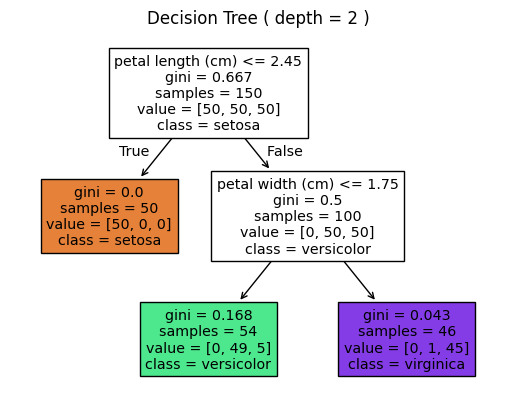

In [88]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(tree_clf, 
          feature_names=iris.feature_names[2:], 
          class_names=iris.target_names,
          filled=True)

plt.title('Decision Tree ( depth = 2 )')
plt.show()

# # make decision tree in dot file #
# from sklearn.tree import export_graphviz

# export_graphviz(
#     tree_clf,
#     out_file='tree.dot',
#     feature_names=iris.feature_names[2:],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )



In [89]:
samples = [[1.5, 0.2], [4.5, 1.3], [5.5, 2.0]]

pred_class_index = tree_clf.predict(samples)

for i, sample in enumerate(samples):
    pred_class_name = iris.target_names[pred_class_index[i]]
    print(f"Predicted flower: {pred_class_name} ({pred_class_index[i]})")


Predicted flower: setosa (0)
Predicted flower: versicolor (1)
Predicted flower: virginica (2)


In [90]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(iris.data, iris.target)

# # feature importance #
for name, score in zip(iris.feature_names, tree_clf.feature_importances_):
    print(f'{name}: {score}')

sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.5619909502262443
petal width (cm): 0.4380090497737556


In [91]:
from sklearn.feature_selection import SelectFromModel

# # automatically select the most important features #
model = SelectFromModel(tree_clf, prefit=True)
X_new = model.transform(iris.data)  
print(X_new.shape)


(150, 2)
